Here, we will combine Ferromagnetic ("FM") and Ferrimagnetic ("FiM") to a single class: "FerroLike"

In [1]:
import pandas as pd

df = pd.read_csv("All_Data_Imported.csv")

#visualizing the data
print("Data Overview:")
df.head()         # First 5 rows
df.tail()         # Last 5 rows
df.sample(8)      # Random 8 rows


Data Overview:


,material_id,formula,band_gap,ordering,numberofelements,density_atomic,elements,volume,nsites,composition,...,density,symmetry,structure,efermi,cbm,vbm,formation_energy_per_atom,energy_above_hull,is_gap_direct,is_stable
85332,mp-755490,Na2FeO3,0.6359,FM,3,13.339997,"[Element Fe, Element Na, Element O]",320.159916,24,Na8 Fe4 O12,...,3.108278,crystal_system=<CrystalSystem.mono: 'Monoclini...,Full Formula (Na8 Fe4 O12)\nReduced Formula: N...,0.758710,1.2291,0.5932,-1.571419,0.080219,False,False
68398,mp-849333,Li5Mn6(BO3)6,0.0000,FM,4,10.875766,"[Element B, Element Li, Element Mn, Element O]",380.651816,35,Li5 Mn6 B6 O18,...,3.128632,crystal_system=<CrystalSystem.tri: 'Triclinic'...,Full Formula (Li5 Mn6 B6 O18)\nReduced Formula...,1.730975,NaN,NaN,-2.473358,0.037956,False,False
80687,mp-2241082,MgTe3WO12,0.2260,NM,4,13.117904,"[Element Mg, Element O, Element Te, Element W]",223.004369,17,Mg1 Te3 W1 O12,...,5.829925,crystal_system=<CrystalSystem.tri: 'Triclinic'...,Full Formula (Mg1 Te3 W1 O12)\nReduced Formula...,4.349635,4.5400,4.3140,-1.692127,0.133167,False,False
65570,mp-777936,Li32Ti11Cr5O48,0.0000,FiM,4,8.998327,"[Element Cr, Element Li, Element O, Element Ti]",863.839358,96,Li32 Ti11 Cr5 O48,...,3.415120,crystal_system=<CrystalSystem.tri: 'Triclinic'...,Full Formula (Li32 Ti11 Cr5 O48)\nReduced Form...,2.542827,NaN,NaN,-2.738731,0.016460,False,False
146638,mp-1208047,TmAgS2,1.4215,NM,3,22.192817,"[Element Ag, Element S, Element Tm]",710.170143,32,Tm8 Ag8 S16,...,6.377419,crystal_system=<CrystalSystem.mono: 'Monoclini...,Full Formula (Tm8 Ag8 S16)\nReduced Formula: T...,4.973267,4.9730,3.5515,-1.526427,0.010762,True,False
55553,mp-1178176,HgPtO2,0.0000,NM,3,17.006114,"[Element Hg, Element O, Element Pt]",68.024454,4,Hg1 Pt1 O2,...,10.439884,crystal_system=<CrystalSystem.mono: 'Monoclini...,Full Formula (Hg1 Pt1 O2)\nReduced Formula: Hg...,2.925929,NaN,NaN,-0.674523,0.029066,False,False
41929,mp-1182727,Co(Mo3O17)2,0.0142,FM,3,19.261127,"[Element Co, Element Mo, Element O]",1579.412388,82,Co2 Mo12 O68,...,2.478179,crystal_system=<CrystalSystem.mono: 'Monoclini...,Full Formula (Co2 Mo12 O68)\nReduced Formula: ...,-2.353500,-2.3418,-2.3560,-0.753185,0.451906,True,False
126525,mp-1199244,CsCuS6,1.0787,NM,3,26.093588,"[Element Cs, Element Cu, Element S]",834.994825,32,Cs4 Cu4 S24,...,3.093128,crystal_system=<CrystalSystem.tri: 'Triclinic'...,Full Formula (Cs4 Cu4 S24)\nReduced Formula: C...,3.789837,3.7900,2.7113,-0.398227,0.000032,False,False


Some properties of these materials.

Number of materials in each magnetic ordering class:
NM: 83355
FerroLike: 68033
AFM: 3415


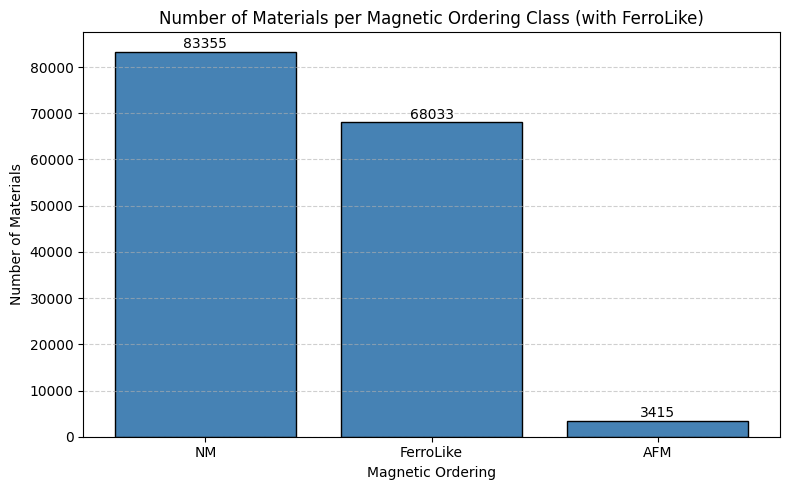

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("All_Data_Imported.csv")

# Drop missing 'ordering' labels
df = df.dropna(subset=["ordering"])

# Combine FM and FiM into "FerroLike"
df["ordering"] = df["ordering"].replace({"FM": "FerroLike", "FiM": "FerroLike"})

# Count number of materials per class
ordering_counts = df["ordering"].value_counts().sort_values(ascending=False)

# Print counts
print("Number of materials in each magnetic ordering class:")
for ordering, count in ordering_counts.items():
    print(f"{ordering}: {count}")

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(ordering_counts.index, ordering_counts.values, color="steelblue", edgecolor="black")

# Add text labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.title("Number of Materials per Magnetic Ordering Class (with FerroLike)")
plt.xlabel("Magnetic Ordering")
plt.ylabel("Number of Materials")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


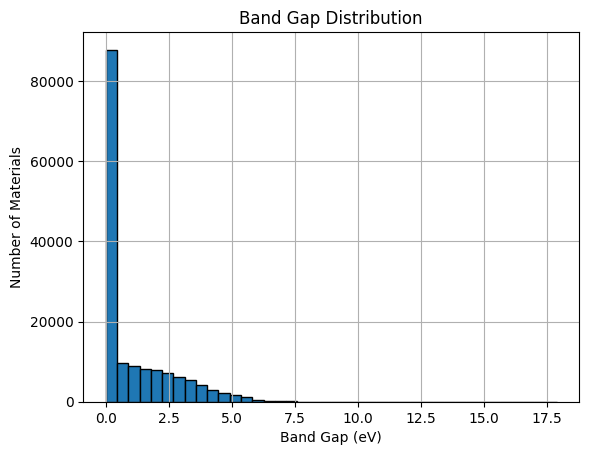

In [3]:
#Band Gap Distribution across all materials
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("All_Data_Imported.csv")


df["band_gap"].hist(bins=40, edgecolor='black')
plt.xlabel("Band Gap (eV)")
plt.ylabel("Number of Materials")
plt.title("Band Gap Distribution")
plt.show()

Most of the materials have small band gaps.

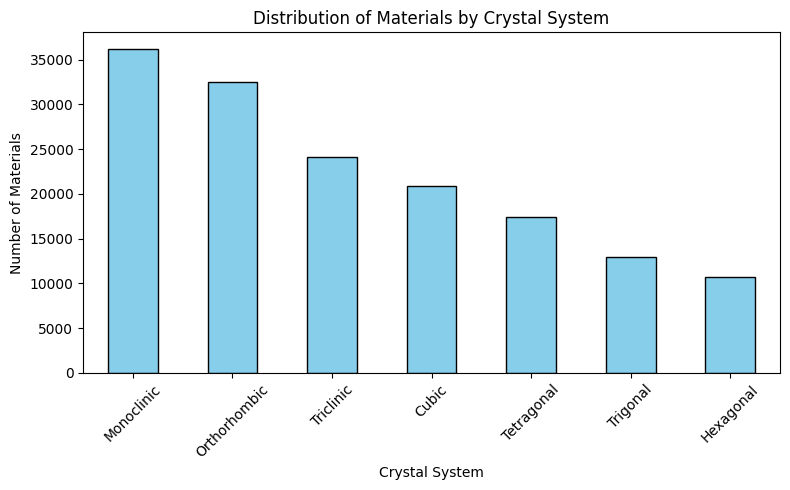

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import re



# Correct crystal system parser
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"

# Apply extraction
df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# Count and plot
counts = df["crystal_system"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribution of Materials by Crystal System")
plt.xlabel("Crystal System")
plt.ylabel("Number of Materials")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


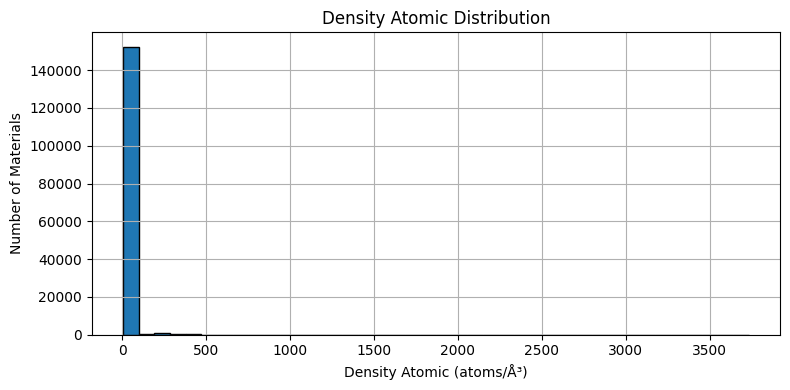

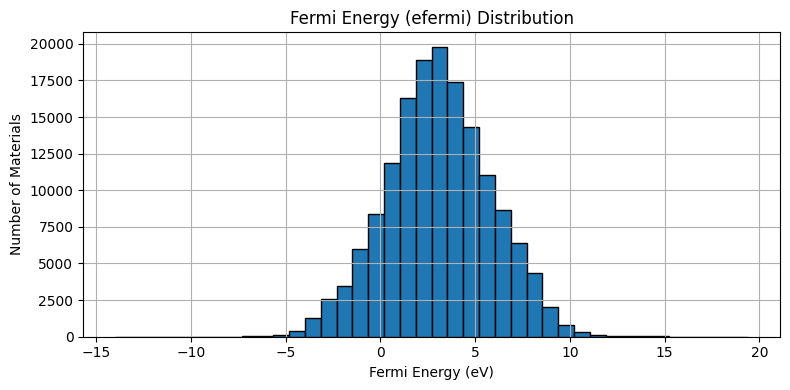

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv("All_Data_Imported.csv")

# === Plot 1: Density Atomic Distribution ===
plt.figure(figsize=(8, 4))
df["density_atomic"].dropna().hist(bins=40, edgecolor='black')
plt.xlabel("Density Atomic (atoms/Å³)")
plt.ylabel("Number of Materials")
plt.title("Density Atomic Distribution")
plt.tight_layout()
plt.show()

# === Plot 2: Fermi Energy (efermi) Distribution ===
plt.figure(figsize=(8, 4))
df["efermi"].dropna().hist(bins=40, edgecolor='black')
plt.xlabel("Fermi Energy (eV)")
plt.ylabel("Number of Materials")
plt.title("Fermi Energy (efermi) Distribution")
plt.tight_layout()
plt.show()


Now, we do SVM on selected features.

First, without Categorical features to compare.

Train size: 53559, Validation size: 17854, Test size: 17854
4-fold Stratified CV (F1_macro) scores on training set: [0.55190044 0.55662458 0.55754351 0.55686519]
Mean CV F1_macro: 0.5557334291142464
Validation Classification Report:
              precision    recall  f1-score   support

         AFM       0.11      0.73      0.18       554
   FerroLike       0.77      0.57      0.66      7270
          NM       0.89      0.77      0.83     10030

    accuracy                           0.69     17854
   macro avg       0.59      0.69      0.56     17854
weighted avg       0.82      0.69      0.74     17854



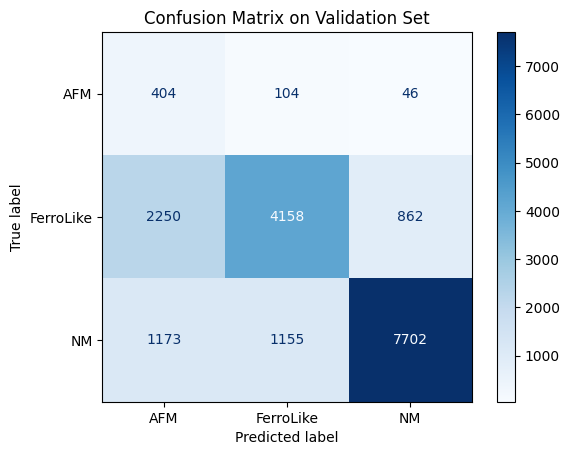

In [15]:
#Without Categorical features.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === 1. Load dataset ===
df = pd.read_csv("All_Data_Imported.csv")

# === 2. Drop NA and combine FM + FiM → FerroLike ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom"]

df = df.dropna(subset=numerical_features + ["ordering"])
df["ordering"] = df["ordering"].replace({"FM": "FerroLike", "FiM": "FerroLike"})

# === 3. Combine features ===
X = df[numerical_features].reset_index(drop=True)

# === 4. Encode labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])

# === 5. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 6. Define SVM Pipeline ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=10, gamma=0.01, class_weight="balanced"))
])

# === 7. Stratified K-Fold CV ===
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=cv, scoring="f1_macro")

print("4-fold Stratified CV (F1_macro) scores on training set:", cv_scores)
print("Mean CV F1_macro:", np.mean(cv_scores))

# === 8. Train final model ===
svm_pipeline.fit(X_train, y_train)

# === 9. Evaluate on Validation Set ===
y_val_pred = svm_pipeline.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))

# === 10. Confusion Matrix ===
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()


We do hyperparameter tuning using Numerical Features alone to consume time and storage.

Train size: 53559, Validation size: 17854, Test size: 17854
Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time= 5.3min
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time= 5.4min
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time= 5.4min
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time= 5.4min
[CV] END ...........................svm__C=0.1, svm__gamma=1; total time= 6.3min
[CV] END ...........................svm__C=0.1, svm__gamma=1; total time= 6.3min
[CV] END ...........................svm__C=0.1, svm__gamma=1; total time= 6.3min
[CV] END ...........................svm__C=0.1, svm__gamma=1; total time= 6.4min
[CV] END ........................svm__C=0.1, svm__gamma=0.01; total time= 6.2min
[CV] END ........................svm__C=0.1, svm__gamma=0.01; total time= 6.2min
[CV] END ........................svm__C=0.1, svm__gamma=0.01; total t

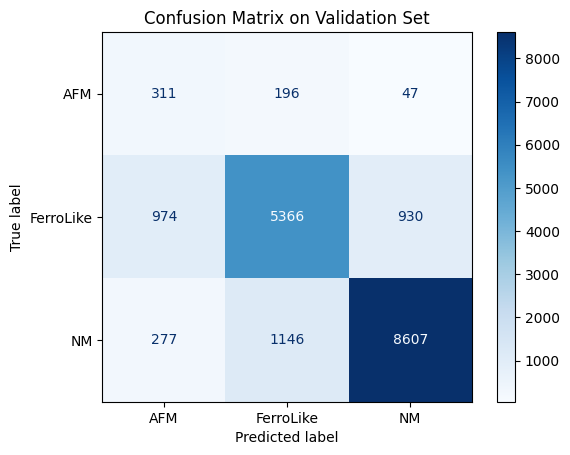

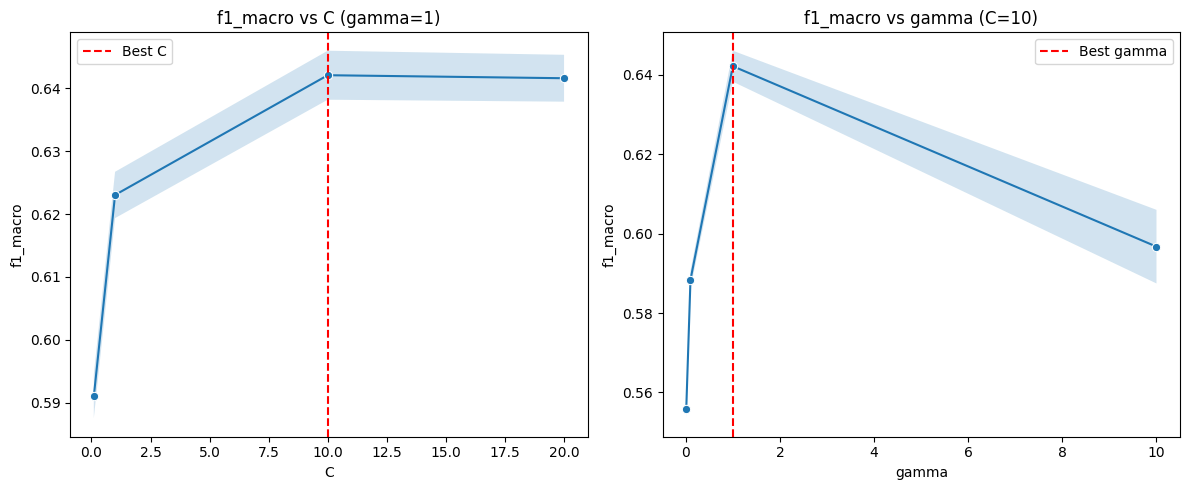

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# === 1. Load dataset ===
df = pd.read_csv("All_Data_Imported.csv")

# === 2. Drop NA and combine FM + FiM → FerroLike ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom"]
df = df.dropna(subset=numerical_features + ["ordering"])
df["ordering"] = df["ordering"].replace({"FM": "FerroLike", "FiM": "FerroLike"})

# === 3. Features and Labels ===
X = df[numerical_features].reset_index(drop=True)
le = LabelEncoder()
y = le.fit_transform(df["ordering"])
class_names = le.classes_

# === 4. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 5. SVM Pipeline ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", class_weight="balanced"))
])

# === 6. Hyperparameter Grid ===
param_grid = {
    "svm__C": [0.1, 1, 10, 20],
    "svm__gamma": [0.01, 0.1, 1, 10]
}

# === 7. GridSearchCV ===
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    svm_pipeline,
    param_grid,
    cv=cv,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

# === 8. Best Model ===
print("Best Parameters:", grid_search.best_params_)
print("Best CV f1_macro Score:", grid_search.best_score_)

# === 9. Evaluate on Validation Set ===
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=class_names))

cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()

# === 10. Plot f1_macro vs C and gamma ===
results_df = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(12, 5))

# --- Plot 1: f1_macro vs C (best gamma fixed) ---
plt.subplot(1, 2, 1)
gamma_fixed = grid_search.best_params_["svm__gamma"]
subset_C = results_df[results_df["param_svm__gamma"] == gamma_fixed]
sns.lineplot(x="param_svm__C", y="mean_test_score", data=subset_C, marker="o")
plt.fill_between(
    subset_C["param_svm__C"].astype(float),
    subset_C["mean_test_score"] - subset_C["std_test_score"],
    subset_C["mean_test_score"] + subset_C["std_test_score"],
    alpha=0.2
)
plt.axvline(grid_search.best_params_["svm__C"], color="red", linestyle="--", label="Best C")
plt.title(f"f1_macro vs C (gamma={gamma_fixed})")
plt.xlabel("C")
plt.ylabel("f1_macro")
plt.legend()

# --- Plot 2: f1_macro vs gamma (best C fixed) ---
plt.subplot(1, 2, 2)
C_fixed = grid_search.best_params_["svm__C"]
subset_gamma = results_df[results_df["param_svm__C"] == C_fixed]
sns.lineplot(x="param_svm__gamma", y="mean_test_score", data=subset_gamma, marker="o")
plt.fill_between(
    subset_gamma["param_svm__gamma"].astype(float),
    subset_gamma["mean_test_score"] - subset_gamma["std_test_score"],
    subset_gamma["mean_test_score"] + subset_gamma["std_test_score"],
    alpha=0.2
)
plt.axvline(grid_search.best_params_["svm__gamma"], color="red", linestyle="--", label="Best gamma")
plt.title(f"f1_macro vs gamma (C={C_fixed})")
plt.xlabel("gamma")
plt.ylabel("f1_macro")
plt.legend()

plt.tight_layout()
plt.show()


We now include Categorical Variables like "Elements" and "Crystal_system". We do one-hot encoding for "Elements" using MultiLabelBinarizer which gives a value 1 if the material has that element, 0 otherwise. We use LabelEncoder for "Crystal_system" which labels different systems with integers. We have a small number of "Crystal_system".

We use the tuned parameters above and some others to see if it gives best performance even when we include Categorical variables.

Train size: 53559, Validation size: 17854, Test size: 17854
4-fold Stratified CV (F1_macro) scores on training set: [0.51089552 0.5351128  0.53089756 0.52783593]
Mean CV F1_macro: 0.5261854540156943
Validation Classification Report:
              precision    recall  f1-score   support

         AFM       0.31      0.19      0.23       554
   FerroLike       0.91      0.41      0.57      7270
          NM       0.70      0.99      0.82     10030

    accuracy                           0.73     17854
   macro avg       0.64      0.53      0.54     17854
weighted avg       0.77      0.73      0.70     17854



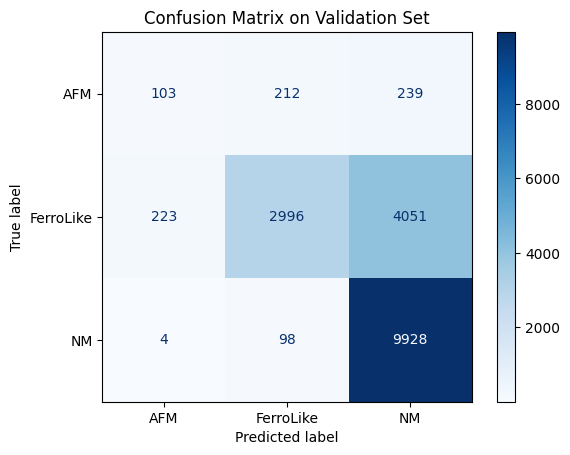

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import re

# === 1. Load dataset ===
df = pd.read_csv("All_Data_Imported.csv")

# === 2. Parse 'elements' ===
def parse_elements(val):
    if pd.isna(val):
        return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]

df["elements"] = df["elements"].apply(parse_elements)

# === 3.1 Extract 'crystal_system' from 'symmetry' column ===
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"

df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# === 3.2 Label encode 'crystal_system' ===
crystal_encoder = LabelEncoder()
df["crystal_system_encoded"] = crystal_encoder.fit_transform(df["crystal_system"])

# === 4. Merge FM and FiM into FerroLike ===
df["ordering"] = df["ordering"].replace({"FM": "FerroLike", "FiM": "FerroLike"})

# === 5. drop NA ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom", "crystal_system_encoded"]
categorical_features = ["is_gap_direct", "is_stable"]

df = df.dropna(subset=numerical_features + categorical_features + ["ordering"])

# === 6. One-hot encode 'elements' ===
mlb = MultiLabelBinarizer()
element_df = pd.DataFrame(mlb.fit_transform(df["elements"]), columns=mlb.classes_)

# === 7. One-hot encode other categorical fields ===
cat_df = pd.get_dummies(df[categorical_features], drop_first=False)

# === 8. Combine all features ===
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
    element_df.reset_index(drop=True),
    cat_df.reset_index(drop=True)
], axis=1)

# === 9. Encode target labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])
class_names = le.classes_

# === 10. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 11. Define SVM Pipeline ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=10, gamma=1, class_weight="balanced"))
])

# === 12. Stratified K-Fold CV ===
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=cv, scoring="f1_macro")

print("4-fold Stratified CV (F1_macro) scores on training set:", cv_scores)
print("Mean CV F1_macro:", np.mean(cv_scores))

# === 13. Train final model ===
svm_pipeline.fit(X_train, y_train)

# === 14. Evaluate on Validation Set ===
y_val_pred = svm_pipeline.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=class_names))

# === 15. Confusion Matrix ===
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()


Mean CV F1_macro of around 0.52 is poor based on previous experience (SVM for 4 classes). We do the same but set the gamma=0.01 

Train size: 53559, Validation size: 17854, Test size: 17854
4-fold Stratified CV (F1_macro) scores on training set: [0.69213664 0.70356956 0.70044239 0.71001445]
Mean CV F1_macro: 0.7015407591859845
Validation Classification Report:
              precision    recall  f1-score   support

         AFM       0.23      0.64      0.34       554
   FerroLike       0.89      0.80      0.84      7270
          NM       0.96      0.94      0.95     10030

    accuracy                           0.87     17854
   macro avg       0.69      0.79      0.71     17854
weighted avg       0.91      0.87      0.89     17854



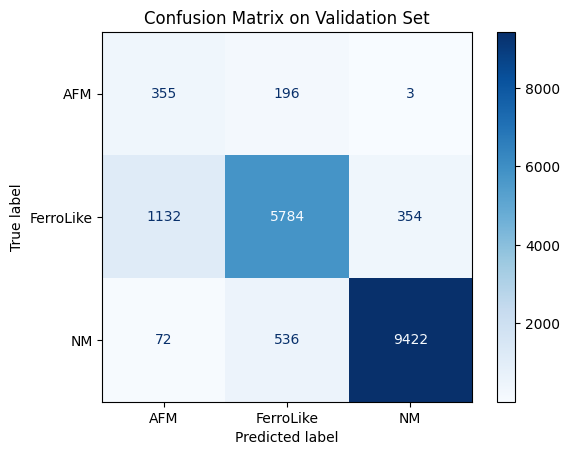

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import re

# === 1. Load dataset ===
df = pd.read_csv("All_Data_Imported.csv")

# === 2. Parse 'elements' ===
def parse_elements(val):
    if pd.isna(val):
        return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]

df["elements"] = df["elements"].apply(parse_elements)

# === 3.1 Extract 'crystal_system' from 'symmetry' column ===
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"

df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# === 3.2 Label encode 'crystal_system' ===
crystal_encoder = LabelEncoder()
df["crystal_system_encoded"] = crystal_encoder.fit_transform(df["crystal_system"])

# === 4. Merge FM and FiM into FerroLike ===
df["ordering"] = df["ordering"].replace({"FM": "FerroLike", "FiM": "FerroLike"})

# === 5. drop NA ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom", "crystal_system_encoded"]
categorical_features = ["is_gap_direct", "is_stable"]

df = df.dropna(subset=numerical_features + categorical_features + ["ordering"])

# === 6. One-hot encode 'elements' ===
mlb = MultiLabelBinarizer()
element_df = pd.DataFrame(mlb.fit_transform(df["elements"]), columns=mlb.classes_)

# === 7. One-hot encode other categorical fields ===
cat_df = pd.get_dummies(df[categorical_features], drop_first=False)

# === 8. Combine all features ===
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
    element_df.reset_index(drop=True),
    cat_df.reset_index(drop=True)
], axis=1)

# === 9. Encode target labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])
class_names = le.classes_

# === 10. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 11. Define SVM Pipeline ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=10, gamma=0.01, class_weight="balanced"))
])

# === 12. Stratified K-Fold CV ===
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=cv, scoring="f1_macro")

print("4-fold Stratified CV (F1_macro) scores on training set:", cv_scores)
print("Mean CV F1_macro:", np.mean(cv_scores))

# === 13. Train final model ===
svm_pipeline.fit(X_train, y_train)

# === 14. Evaluate on Validation Set ===
y_val_pred = svm_pipeline.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=class_names))

# === 15. Confusion Matrix ===
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()


Mean CV F1_Macro score of 0.7 is much better. Henceforth, we set C=10 and Gamma=0.01.

Low precision in AFM has to do with small number of materials. We now increase the number of AFM in the training set using SMOTE.

In [6]:
pip install imbalanced-learn


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

Train size: 53559, Validation size: 17854, Test size: 17854

Class counts after SMOTE:
NM: 30090
AFM: 30090
FerroLike: 21807


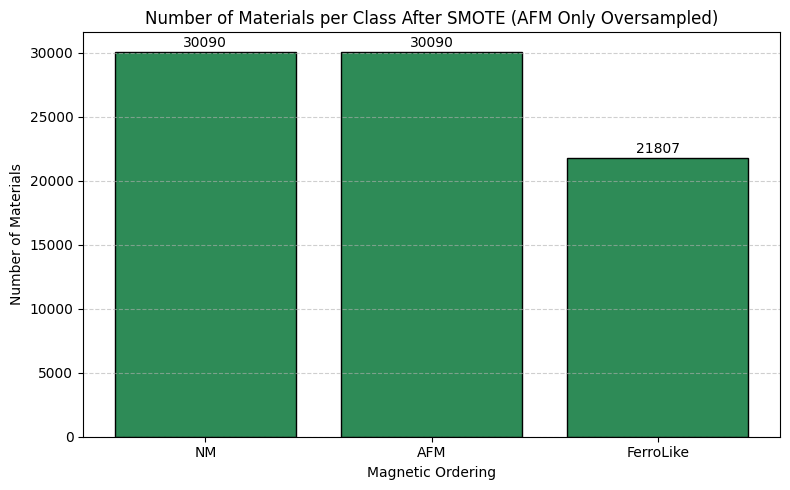


Validation Classification Report:
              precision    recall  f1-score   support

         AFM       0.31      0.25      0.28       554
   FerroLike       0.87      0.90      0.89      7270
          NM       0.96      0.94      0.95     10030

    accuracy                           0.90     17854
   macro avg       0.71      0.70      0.70     17854
weighted avg       0.90      0.90      0.90     17854



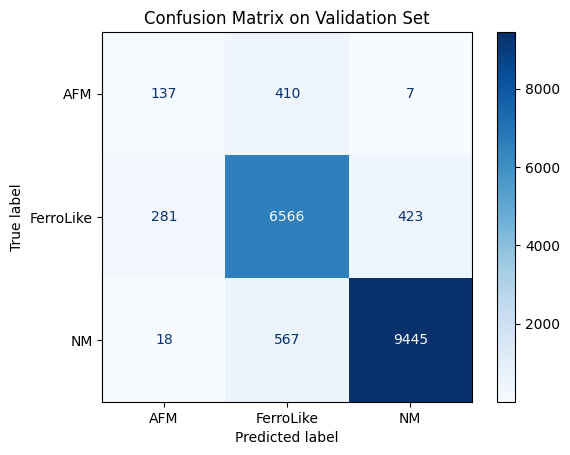

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

# === 1. Load dataset ===
df = pd.read_csv("All_Data_Imported.csv")

# === 2. Parse 'elements' ===
def parse_elements(val):
    if pd.isna(val):
        return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]
df["elements"] = df["elements"].apply(parse_elements)

# === 3. Extract crystal_system from symmetry ===
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"
df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# === 4. Label encode crystal_system ===
crystal_encoder = LabelEncoder()
df["crystal_system_encoded"] = crystal_encoder.fit_transform(df["crystal_system"])

# === 5. Drop NA and merge FM + FiM → FerroLike ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom", "crystal_system_encoded"]
categorical_features = ["is_gap_direct", "is_stable"]

df = df.dropna(subset=numerical_features + categorical_features + ["ordering"])
df["ordering"] = df["ordering"].replace({"FM": "FerroLike", "FiM": "FerroLike"})

# === 6. One-hot encode 'elements' ===
mlb = MultiLabelBinarizer()
element_df = pd.DataFrame(mlb.fit_transform(df["elements"]), columns=mlb.classes_)

# === 7. One-hot encode categorical fields ===
cat_df = pd.get_dummies(df[categorical_features], drop_first=False)

# === 8. Combine all features ===
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
    element_df.reset_index(drop=True),
    cat_df.reset_index(drop=True)
], axis=1)

# === 9. Encode target labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])
label_names = le.classes_

# === 10. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 11. Apply SMOTE only to AFM class ===
afm_index = list(label_names).index("AFM")
y_train_series = pd.Series(y_train)
afm_mask = y_train_series == afm_index

# Count max class size to upsample AFM to that
from collections import Counter
class_counts = Counter(y_train)
target_count = max(class_counts.values())

sampling_strategy = {afm_index: target_count}

smote = SMOTE(random_state=42, sampling_strategy=sampling_strategy)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# === 12. Define and train pipeline ===
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C=10, gamma=0.01, kernel='rbf', class_weight='balanced'))
])
pipeline.fit(X_train_resampled, y_train_resampled)

# === 13. Print class counts after SMOTE ===
resampled_counts = pd.Series(y_train_resampled).value_counts().sort_values(ascending=False)
resampled_labels = le.inverse_transform(resampled_counts.index)

print("\nClass counts after SMOTE:")
for name, count in zip(resampled_labels, resampled_counts):
    print(f"{name}: {count}")

# === 14. Plot class distribution after SMOTE ===
plt.figure(figsize=(8, 5))
bars = plt.bar(resampled_labels, resampled_counts.values, color="seagreen", edgecolor="black")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.title("Number of Materials per Class After SMOTE (AFM Only Oversampled)")
plt.xlabel("Magnetic Ordering")
plt.ylabel("Number of Materials")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# === 15. Evaluate on Validation Set ===
y_val_pred = pipeline.predict(X_val)
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=label_names))

cm_val = confusion_matrix(y_val, y_val_pred)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=label_names)
disp_val.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()
